In [1]:
# plot the response time graph of the system, throughput of the system, and error of the system measured from client side log

import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import pchip_interpolate

In [12]:
def plot_excel_fixed_legend(filename, output_image):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_excel(filename)
    
    # Get the column names
    columns = df.columns
    
    # Plotting
    x_axis = columns[0]
    y_axes = columns[1:]
    
    for y_axis in y_axes:
        # Interpolate the data using pchip interpolation
        x = df[x_axis].values
        y = df[y_axis].values
        x_new = df[x_axis].min() + (df[x_axis].max() - df[x_axis].min()) * \
                (pd.Series(range(len(df[x_axis]) * 10)) / (len(df[x_axis]) * 10))
        y_new = pchip_interpolate(x, y, x_new)
        
        # Check if the current line is for Australia and if so, use a dashed line
        if 'Australia' in y_axis:
            plt.plot(x_new, y_new, linestyle='--', label=f"{y_axis} (100 users)")
        else:
            plt.plot(x_new, y_new, label=y_axis)
    
    plt.xlabel("Time (min)")
    plt.ylabel("Time (s)")
    plt.title("REST Response Time 5000 Users")
    # Set the legend to be in the top right corner outside the plot area
    plt.legend(loc='lower right', bbox_to_anchor=(1, 0))
    plt.savefig(output_image)  # Save the plot as an image
    plt.show()

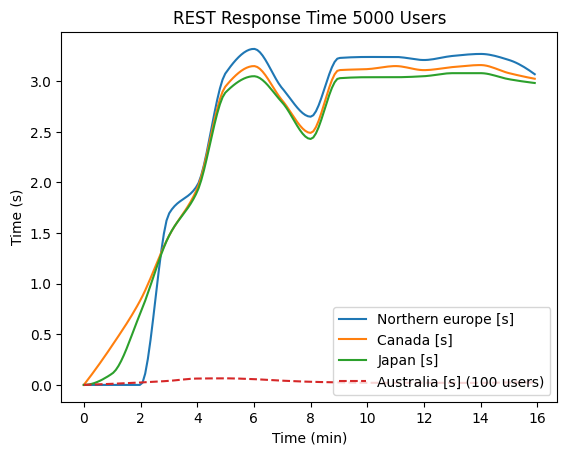

In [13]:
# Example usage:
filename = "distributed_single.xlsx"
output_image = "rest_response_time_5000.png"
plot_excel_fixed_legend(filename, output_image)